In [6]:
import numpy as np
import sounddevice as sd 
from scipy.io import wavfile
import matplotlib.pyplot as plt
import scipy.signal as signal
import librosa
from scipy.fft import fft, fftfreq, ifft
import soundfile as sf
import scipy
import os
from scipy.io.wavfile import write
import scipy.io.wavfile as wav
from scipy.signal import hilbert

fs = 44100 # sample rate kub
# frequencies = fftfreq(len(audio), 1/fs) # frequency


In [7]:
# import sounddevice as sd
# import wave
# import os

# output_path = "./soundwav/input1.wav" # path เสียงแรก
# os.makedirs(os.path.dirname(output_path), exist_ok=True)

# duration = 5  # ระยะเวลาการบันทึก (วินาที)
# fs = 44100  # Sampling rate
# channels = 1  # บันทึกในแบบโมโน

# print("กำลังบันทึกเสียง...")
# audio = sd.rec(int(duration * fs), samplerate=fs, channels=channels, dtype='int16')
# sd.wait()  # รอจนกว่าการบันทึกจะเสร็จสมบูรณ์
# print("บันทึกเสียงเสร็จแล้ว!")

# # เขียนไฟล์เสียงแบบ .wav ด้วย wave
# with wave.open(output_path, 'wb') as wf:
#     wf.setnchannels(channels)  # จำนวนช่องเสียง
#     wf.setsampwidth(2)  # ขนาดข้อมูล 2 bytes (16 บิต)
#     wf.setframerate(fs)  # Sample rate
#     wf.writeframes(audio.tobytes())  # เขียนข้อมูลเสียง

# print(f"บันทึกไฟล์เสียงสำเร็จที่ {output_path}")

In [8]:
# import sounddevice as sd
# import wave
# import os

# output_path = "./soundwav/input2.wav" # path เสียงที่สอง
# os.makedirs(os.path.dirname(output_path), exist_ok=True)

# duration = 5  # ระยะเวลาการบันทึก (วินาที)
# fs = 44100  # Sampling rate
# channels = 1  # บันทึกในแบบโมโน

# print("กำลังบันทึกเสียง...")
# audio = sd.rec(int(duration * fs), samplerate=fs, channels=channels, dtype='int16')
# sd.wait()  # รอจนกว่าการบันทึกจะเสร็จสมบูรณ์
# print("บันทึกเสียงเสร็จแล้ว!")

# # เขียนไฟล์เสียงแบบ .wav ด้วย wave
# with wave.open(output_path, 'wb') as wf:
#     wf.setnchannels(channels)  # จำนวนช่องเสียง
#     wf.setsampwidth(2)  # ขนาดข้อมูล 2 bytes (16 บิต)
#     wf.setframerate(fs)  # Sample rate
#     wf.writeframes(audio.tobytes())  # เขียนข้อมูลเสียง

# print(f"บันทึกไฟล์เสียงสำเร็จที่ {output_path}")

In [9]:
output_path = "./soundwav/input1.wav"
fs, audio = wavfile.read(output_path) 
# sd.play(audio,fs) 
# sd.wait()
# สร้าง filter สำหรับตัดเสียงรบกวน
lower = 0
upper = 3000
audio_fft = fft(audio)
# คำนวณ frequencies ใหม่ตามขนาดของ audio ปัจจุบัน
frequencies_new = fftfreq(len(audio), 1/fs)
mask = (np.abs(frequencies_new) >= lower) & (np.abs(frequencies_new) <= upper)
filtered_fft = audio_fft * mask 

# แปลงกลับจาก Frequency Domain ไปยัง Time Domain
filtered_audio = ifft(filtered_fft).real

# บันทึกไฟล์เสียงที่ผ่านการกรองแล้ว
output_path = './soundwav/output_deletenoise1.wav'
sf.write(output_path, filtered_audio.astype(np.int16), fs)

# ทดสอบเสียงที่ตัดเสียงรบกวนแล้ว
PATH = output_path

fs, audio = wavfile.read(PATH) 
# sd.play(audio,fs) 
# sd.wait()

In [10]:
output_path = "./soundwav/input2.wav"
fs, audio = wavfile.read(output_path) 
# sd.play(audio,fs) 
# sd.wait()
# สร้าง filter สำหรับตัดเสียงรบกวน
lower = 0
upper = 3000
audio_fft = fft(audio)
# คำนวณ frequencies ใหม่ตามขนาดของ audio ปัจจุบัน
frequencies_new = fftfreq(len(audio), 1/fs)
mask = (np.abs(frequencies_new) >= lower) & (np.abs(frequencies_new) <= upper)
filtered_fft = audio_fft * mask 

# แปลงกลับจาก Frequency Domain ไปยัง Time Domain
filtered_audio = ifft(filtered_fft).real

# บันทึกไฟล์เสียงที่ผ่านการกรองแล้ว
output_path = './soundwav/output_deletenoise2.wav'
sf.write(output_path, filtered_audio.astype(np.int16), fs)

# ทดสอบเสียงที่ตัดเสียงรบกวนแล้ว
PATH = output_path

fs, audio = wavfile.read(PATH) 

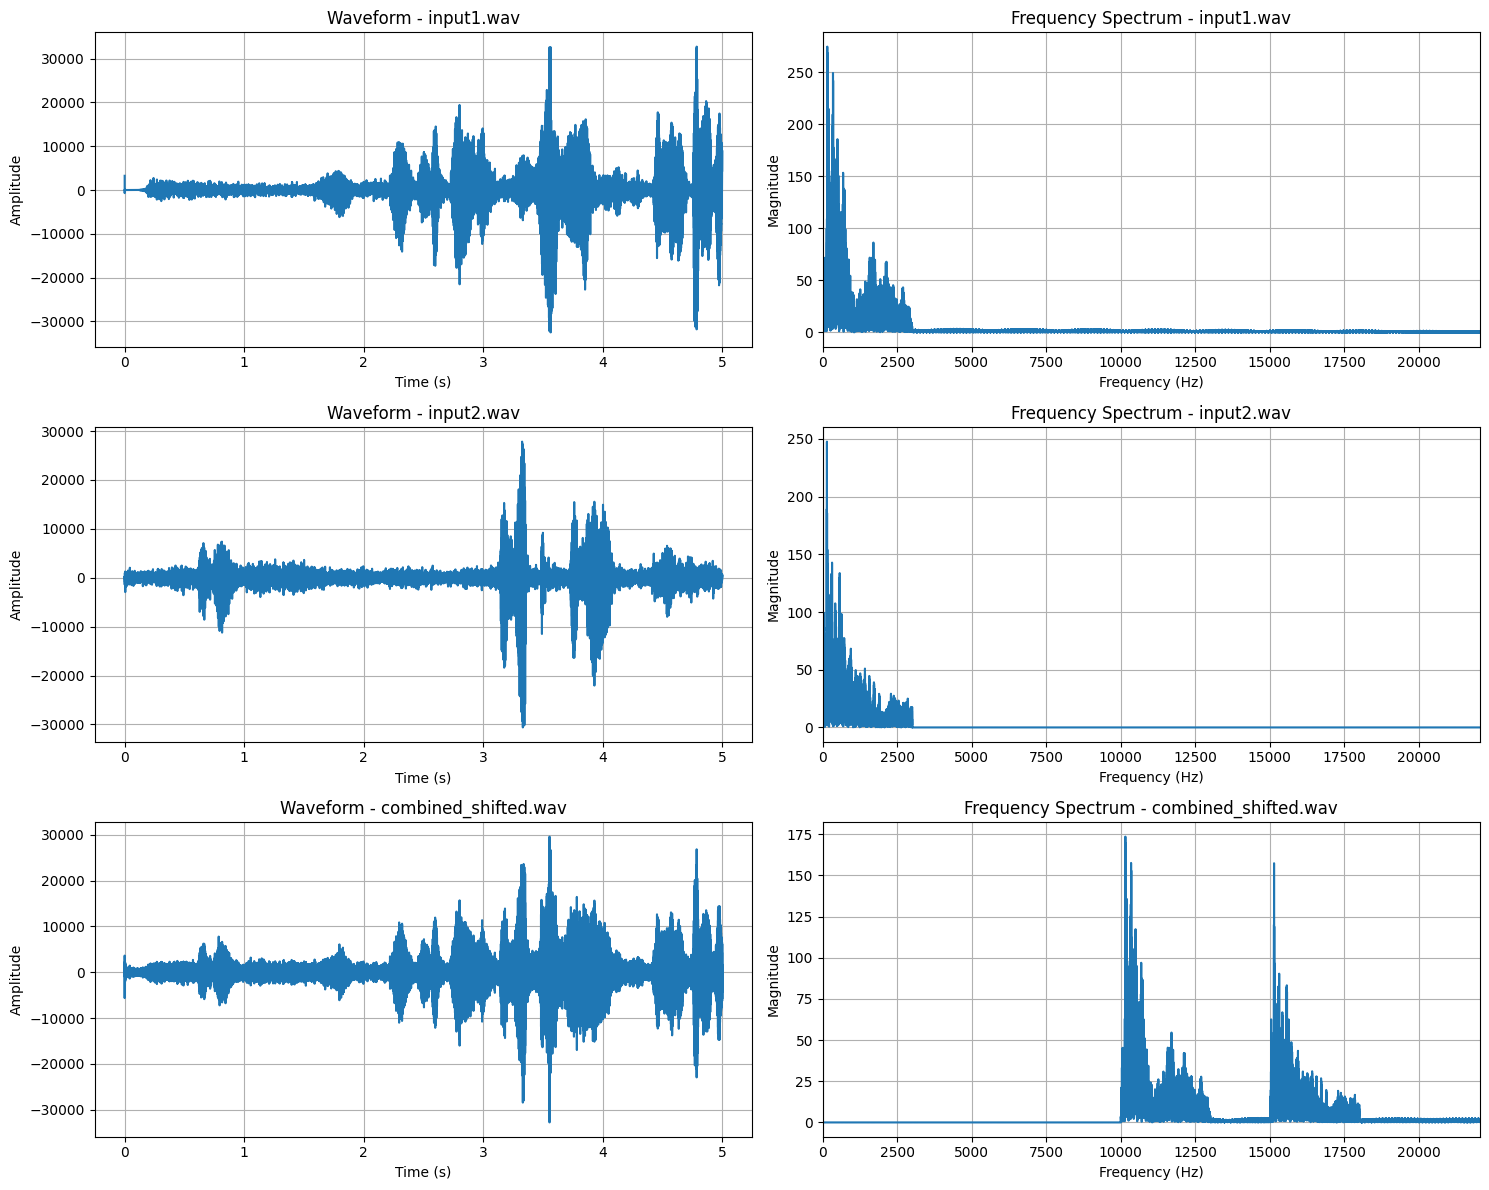

In [11]:
# Load the audio files if not already loaded
input_path1 = './soundwav/output_deletenoise1.wav'
input_path2 = './soundwav/output_deletenoise2.wav'
combined_path = './soundwav/combined_shifted.wav'

# Read the audio files
fs1, audio_input1 = wavfile.read(input_path1)
fs2, audio_input2 = wavfile.read(input_path2)
fs_combined, audio_combined = wavfile.read(combined_path)

# Create time arrays for plotting
time1 = np.arange(0, len(audio_input1)) / fs1
time2 = np.arange(0, len(audio_input2)) / fs2
time_combined = np.arange(0, len(audio_combined)) / fs_combined

# Create a figure with multiple subplots
plt.figure(figsize=(15, 12))

# Plot waveforms
plt.subplot(3, 2, 1)
plt.plot(time1, audio_input1)
plt.title("Waveform - input1.wav")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(3, 2, 3)
plt.plot(time2, audio_input2)
plt.title("Waveform - input2.wav")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(3, 2, 5)
plt.plot(time_combined, audio_combined)
plt.title("Waveform - combined_shifted.wav")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

# Compute and plot frequency spectra
def plot_spectrum(ax, audio, fs, title):
    # Compute FFT
    N = len(audio)
    yf = fft(audio)
    xf = fftfreq(N, 1/fs)
    # Plot only positive frequencies up to Nyquist frequency
    half_N = N//2
    ax.plot(xf[:half_N], 2.0/N * np.abs(yf[:half_N]))
    ax.set_title(title)
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Magnitude")
    ax.set_xlim([0, fs/2])  # Show up to Nyquist frequency
    ax.grid(True)

ax1 = plt.subplot(3, 2, 2)
plot_spectrum(ax1, audio_input1, fs1, "Frequency Spectrum - input1.wav")

ax2 = plt.subplot(3, 2, 4)
plot_spectrum(ax2, audio_input2, fs2, "Frequency Spectrum - input2.wav")

ax3 = plt.subplot(3, 2, 6)
plot_spectrum(ax3, audio_combined, fs_combined, "Frequency Spectrum - combined_shifted.wav")

plt.tight_layout()
plt.show()

In [12]:
import numpy as np
from scipy.io import wavfile
from scipy.signal import hilbert
import soundfile as sf
import sounddevice as sd

def shift_frequency(audio, fs, shift_amount):
    """
    Shift the frequency content of an audio signal
    
    Parameters:
    audio: Input audio signal
    fs: Sample rate in Hz
    shift_amount: Amount to shift frequency in Hz
    
    Returns:
    Frequency-shifted audio signal
    """
    # Convert to float for processing
    audio = audio.astype(np.float32)
    
    # Create analytic signal using Hilbert transform
    analytic_signal = hilbert(audio)
    
    # Create time vector
    t = np.arange(len(audio)) / fs
    
    # Shift frequency by multiplying with complex exponential
    shifted_signal_complex = analytic_signal * np.exp(1j * 2 * np.pi * shift_amount * t)
    
    # Take real part as the result
    shifted_signal = np.real(shifted_signal_complex)
    
    return shifted_signal

# Read input files
input_path1 = './soundwav/output_deletenoise1.wav'
input_path2 = './soundwav/output_deletenoise2.wav'

fs1, audio1 = wavfile.read(input_path1)
fs2, audio2 = wavfile.read(input_path2)

# Check if sample rate is sufficient
nyquist = min(fs1, fs2) / 2


# Ensure both signals have the same length
min_length = min(len(audio1), len(audio2))
audio1 = audio1[:min_length]
audio2 = audio2[:min_length]

# Shift frequencies
shifted_audio1 = shift_frequency(audio1, fs, 10000)  # Middle of 10001-13000 Hz
shifted_audio2 = shift_frequency(audio2, fs, 15000)  # Middle of 15000-18000 Hz

# Combine both shifted signals
combined_signal = shifted_audio1 + shifted_audio2

# Normalize to prevent clipping
max_val = max(abs(np.max(combined_signal)), abs(np.min(combined_signal)))
if max_val > 32767:  # Max value for int16
    combined_signal = combined_signal * (32767 / max_val)

# Convert to int16 for saving
combined_signal_int16 = np.int16(combined_signal)

# Save output
output_path = './soundwav/combined_shifted.wav'
sf.write(output_path, combined_signal_int16, fs)
print(f"Saved combined frequency-shifted audio to {output_path}")

# Play the result
print("Playing combined audio:")
fs_test, audio_test = wavfile.read(output_path)
sd.play(audio_test, fs_test)
sd.wait()

Saved combined frequency-shifted audio to ./soundwav/combined_shifted.wav
Playing combined audio:


In [13]:
import numpy as np
from scipy.io import wavfile
from scipy.signal import hilbert, butter, filtfilt
import soundfile as sf
import sounddevice as sd
import matplotlib.pyplot as plt

# อ่านไฟล์เสียงที่รวมกัน
combined_path = './soundwav/combined_shifted.wav'
fs, combined_audio = wavfile.read(combined_path)
combined_audio = combined_audio.astype(np.float32)

def bandpass_filter(signal, lowcut, highcut, fs, order=5):
    """
    สร้างและใช้งาน bandpass filter
    """
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

def shift_frequency(audio, fs, shift_amount):
    """
    เลื่อนความถี่เสียง
    """
    # สร้าง analytic signal
    analytic_signal = hilbert(audio)
    
    # สร้างเวกเตอร์เวลา
    t = np.arange(len(audio)) / fs
    
    # เลื่อนความถี่
    shifted_signal_complex = analytic_signal * np.exp(1j * 2 * np.pi * shift_amount * t)
    
    # เอาเฉพาะส่วนจริง
    shifted_signal = np.real(shifted_signal_complex)
    
    return shifted_signal

# แยกเสียงด้วย bandpass filter
# กรองเสียงแรก (อยู่ในช่วง 10000-13000 Hz)
audio1_filtered = bandpass_filter(combined_audio, 10000, 13000, fs)

# กรองเสียงที่สอง (อยู่ในช่วง 15000-18000 Hz)
audio2_filtered = bandpass_filter(combined_audio, 15000, 18000, fs)

# เลื่อนความถี่กลับ (shift down)
audio1_original = shift_frequency(audio1_filtered, fs, -10000)  # shift down 10000 Hz
audio2_original = shift_frequency(audio2_filtered, fs, -15000)  # shift down 15000 Hz

# ปรับระดับความดัง (normalization)
def normalize_audio(audio):
    max_val = max(abs(np.max(audio)), abs(np.min(audio)))
    if max_val > 0:
        return audio * (32767 / max_val)
    return audio

audio1_original = normalize_audio(audio1_original)
audio2_original = normalize_audio(audio2_original)

# บันทึกไฟล์เสียง
sf.write('./soundwav/extracted_audio1.wav', audio1_original.astype(np.int16), fs)
sf.write('./soundwav/extracted_audio2.wav', audio2_original.astype(np.int16), fs)

print("บันทึกไฟล์เสียงที่แยกแล้วเป็น extracted_audio1.wav และ extracted_audio2.wav")

บันทึกไฟล์เสียงที่แยกแล้วเป็น extracted_audio1.wav และ extracted_audio2.wav


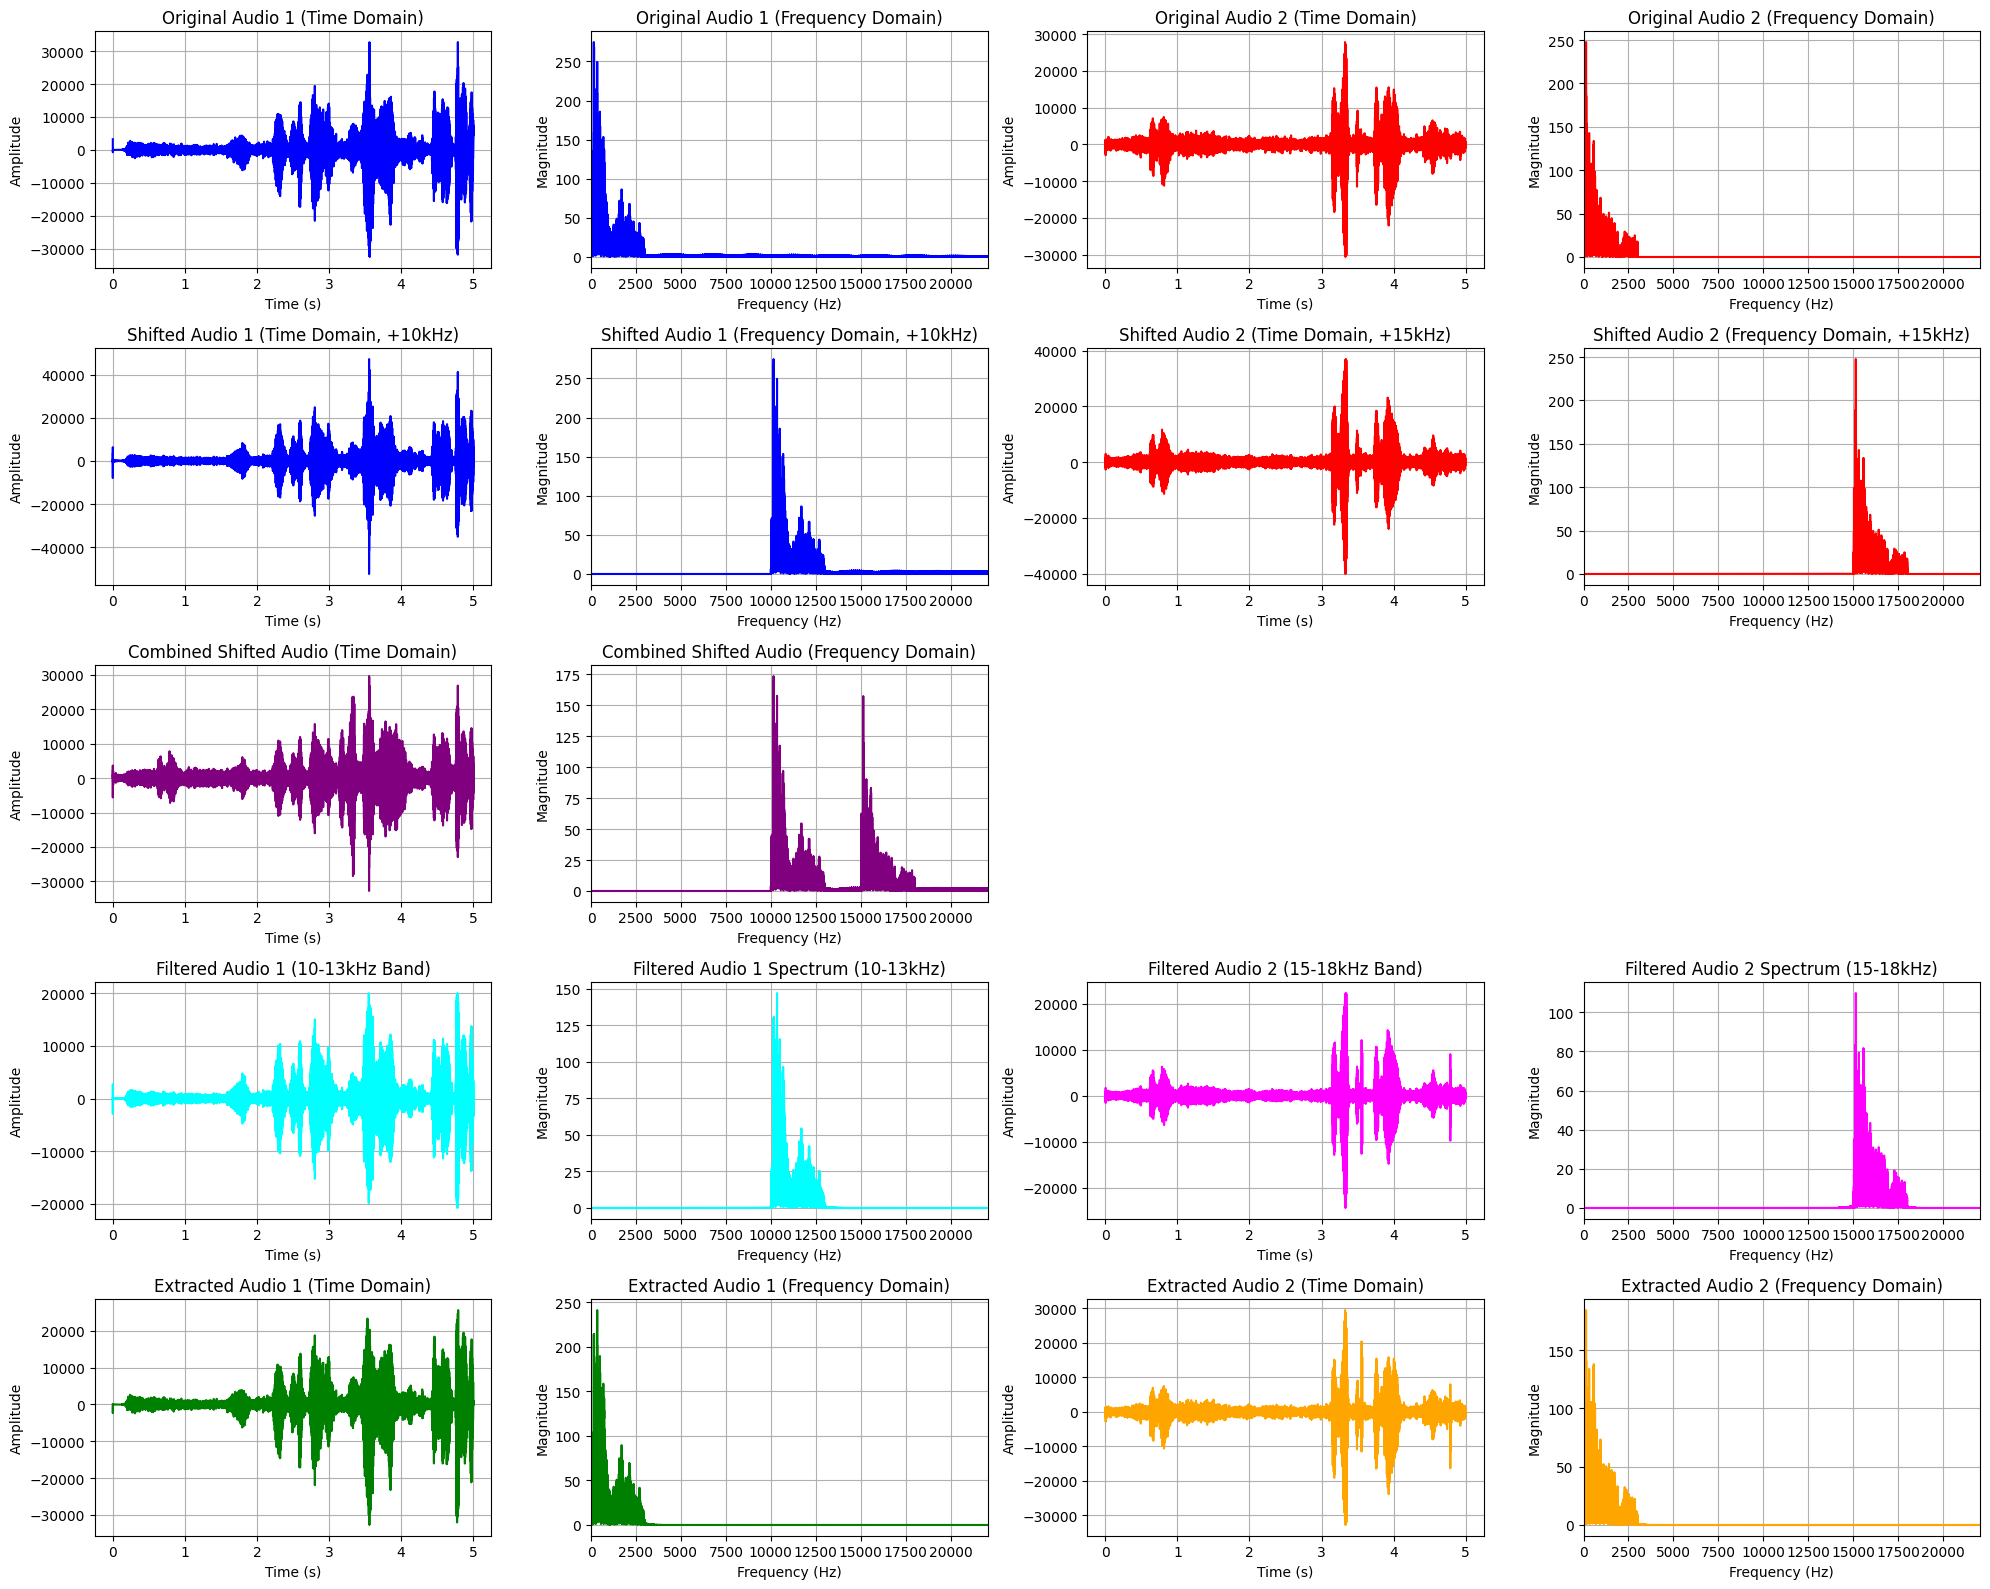

In [14]:
# Create a comprehensive visualization of audio processing stages
plt.figure(figsize=(20, 16))

# Load original files if not already in memory
fs1, audio_original1 = wavfile.read(input_path1)
fs2, audio_original2 = wavfile.read(input_path2)
fs_combined, audio_combined = wavfile.read(combined_path)
fs_extracted1, audio_extracted1 = wavfile.read('./soundwav/extracted_audio1.wav')
fs_extracted2, audio_extracted2 = wavfile.read('./soundwav/extracted_audio2.wav')

# Create time arrays for plotting
time_original1 = np.arange(0, len(audio_original1)) / fs1
time_original2 = np.arange(0, len(audio_original2)) / fs2
time_combined = np.arange(0, len(audio_combined)) / fs_combined
time_extracted1 = np.arange(0, len(audio_extracted1)) / fs_extracted1
time_extracted2 = np.arange(0, len(audio_extracted2)) / fs_extracted2

# Function to plot spectrum
def plot_spectrum(ax, audio, fs, title, color='blue'):
    N = len(audio)
    yf = fft(audio)
    xf = fftfreq(N, 1/fs)
    half_N = N//2
    ax.plot(xf[:half_N], 2.0/N * np.abs(yf[:half_N]), color=color)
    ax.set_title(title)
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Magnitude")
    ax.set_xlim([0, fs/2])
    ax.grid(True)

# Row 1: Original Audio
# Original Audio 1
plt.subplot(5, 4, 1)
plt.plot(time_original1, audio_original1, color='blue')
plt.title("Original Audio 1 (Time Domain)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

# Original Audio 1 Spectrum
ax = plt.subplot(5, 4, 2)
plot_spectrum(ax, audio_original1, fs1, "Original Audio 1 (Frequency Domain)", 'blue')

# Original Audio 2
plt.subplot(5, 4, 3)
plt.plot(time_original2, audio_original2, color='red')
plt.title("Original Audio 2 (Time Domain)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

# Original Audio 2 Spectrum
ax = plt.subplot(5, 4, 4)
plot_spectrum(ax, audio_original2, fs2, "Original Audio 2 (Frequency Domain)", 'red')

# Row 2: Shifted Audio (simulated)
# Load original files and apply shift function from Cell 6
min_length = min(len(audio_original1), len(audio_original2))
audio_original1_trim = audio_original1[:min_length]
audio_original2_trim = audio_original2[:min_length]

# Using the shift_frequency function defined earlier
shifted_audio1 = shift_frequency(audio_original1_trim.astype(np.float32), fs, 10000)
shifted_audio2 = shift_frequency(audio_original2_trim.astype(np.float32), fs, 15000)

time_shifted = np.arange(0, len(shifted_audio1)) / fs

# Shifted Audio 1
plt.subplot(5, 4, 5)
plt.plot(time_shifted, shifted_audio1, color='blue')
plt.title("Shifted Audio 1 (Time Domain, +10kHz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

# Shifted Audio 1 Spectrum
ax = plt.subplot(5, 4, 6)
plot_spectrum(ax, shifted_audio1, fs, "Shifted Audio 1 (Frequency Domain, +10kHz)", 'blue')

# Shifted Audio 2
plt.subplot(5, 4, 7)
plt.plot(time_shifted, shifted_audio2, color='red')
plt.title("Shifted Audio 2 (Time Domain, +15kHz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

# Shifted Audio 2 Spectrum
ax = plt.subplot(5, 4, 8)
plot_spectrum(ax, shifted_audio2, fs, "Shifted Audio 2 (Frequency Domain, +15kHz)", 'red')

# Row 3: Combined Audio
plt.subplot(5, 4, 9)
plt.plot(time_combined, audio_combined, color='purple')
plt.title("Combined Shifted Audio (Time Domain)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

# Combined Audio Spectrum
ax = plt.subplot(5, 4, 10)
plot_spectrum(ax, audio_combined, fs_combined, "Combined Shifted Audio (Frequency Domain)", 'purple')

# Row 4: Filtered Audio (simulated)
# Using the bandpass_filter function defined in Cell 7
def bandpass_filter(signal, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = scipy.signal.butter(order, [low, high], btype='band')
    return scipy.signal.filtfilt(b, a, signal)

audio_combined_float = audio_combined.astype(np.float32)
filtered_audio1 = bandpass_filter(audio_combined_float, 10000, 13000, fs)
filtered_audio2 = bandpass_filter(audio_combined_float, 15000, 18000, fs)

# Filtered Audio 1
plt.subplot(5, 4, 13)
plt.plot(time_combined, filtered_audio1, color='cyan')
plt.title("Filtered Audio 1 (10-13kHz Band)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

# Filtered Audio 1 Spectrum
ax = plt.subplot(5, 4, 14)
plot_spectrum(ax, filtered_audio1, fs, "Filtered Audio 1 Spectrum (10-13kHz)", 'cyan')

# Filtered Audio 2
plt.subplot(5, 4, 15)
plt.plot(time_combined, filtered_audio2, color='magenta')
plt.title("Filtered Audio 2 (15-18kHz Band)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

# Filtered Audio 2 Spectrum
ax = plt.subplot(5, 4, 16)
plot_spectrum(ax, filtered_audio2, fs, "Filtered Audio 2 Spectrum (15-18kHz)", 'magenta')

# Row 5: Extracted Audio (after shifting back)
plt.subplot(5, 4, 17)
plt.plot(time_extracted1, audio_extracted1, color='green')
plt.title("Extracted Audio 1 (Time Domain)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

# Extracted Audio 1 Spectrum
ax = plt.subplot(5, 4, 18)
plot_spectrum(ax, audio_extracted1, fs_extracted1, "Extracted Audio 1 (Frequency Domain)", 'green')

# Extracted Audio 2
plt.subplot(5, 4, 19)
plt.plot(time_extracted2, audio_extracted2, color='orange')
plt.title("Extracted Audio 2 (Time Domain)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

# Extracted Audio 2 Spectrum
ax = plt.subplot(5, 4, 20)
plot_spectrum(ax, audio_extracted2, fs_extracted2, "Extracted Audio 2 (Frequency Domain)", 'orange')

plt.tight_layout()
plt.show()

In [ ]:
# Create a visualization comparing the original, denoised, and extracted audio signals
plt.figure(figsize=(15, 12))

# Load original and processed files
fs_orig1, audio_orig1 = wavfile.read("./soundwav/input1.wav")
fs_orig2, audio_orig2 = wavfile.read("./soundwav/input2.wav")
fs_denoised1, audio_denoised1 = wavfile.read("./soundwav/output_deletenoise1.wav")
fs_denoised2, audio_denoised2 = wavfile.read("./soundwav/output_deletenoise2.wav")
fs_extracted1, audio_extracted1 = wavfile.read("./soundwav/extracted_audio1.wav")
fs_extracted2, audio_extracted2 = wavfile.read("./soundwav/extracted_audio2.wav")

# Create time arrays for plotting
time_orig1 = np.arange(len(audio_orig1)) / fs_orig1
time_orig2 = np.arange(len(audio_orig2)) / fs_orig2
time_denoised1 = np.arange(len(audio_denoised1)) / fs_denoised1
time_denoised2 = np.arange(len(audio_denoised2)) / fs_denoised2
time_extracted1 = np.arange(len(audio_extracted1)) / fs_extracted1
time_extracted2 = np.arange(len(audio_extracted2)) / fs_extracted2

# Row 1: Audio 1 Processing
plt.subplot(3, 3, 1)
plt.plot(time_orig1[:min(len(time_orig1), 44100)], audio_orig1[:min(len(audio_orig1), 44100)], 'gray')
plt.title("Original Audio 1 (First 1s)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(3, 3, 2)
plt.plot(time_denoised1[:min(len(time_denoised1), 44100)], audio_denoised1[:min(len(audio_denoised1), 44100)], 'blue')
plt.title("Denoised Audio 1 (First 1s)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(3, 3, 3)
plt.plot(time_extracted1[:min(len(time_extracted1), 44100)], audio_extracted1[:min(len(audio_extracted1), 44100)], 'green')
plt.title("Extracted Audio 1 (First 1s)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

# Row 2: Audio 2 Processing
plt.subplot(3, 3, 4)
plt.plot(time_orig2[:min(len(time_orig2), 44100)], audio_orig2[:min(len(audio_orig2), 44100)], 'gray')
plt.title("Original Audio 2 (First 1s)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(3, 3, 5)
plt.plot(time_denoised2[:min(len(time_denoised2), 44100)], audio_denoised2[:min(len(audio_denoised2), 44100)], 'red')
plt.title("Denoised Audio 2 (First 1s)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(3, 3, 6)
plt.plot(time_extracted2[:min(len(time_extracted2), 44100)], audio_extracted2[:min(len(audio_extracted2), 44100)], 'orange')
plt.title("Extracted Audio 2 (First 1s)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

# Row 3: Frequency Domain
def plot_fft(ax, audio, fs, title, color):
    N = len(audio)
    yf = fft(audio)
    xf = fftfreq(N, 1/fs)
    half_N = N//2
    ax.semilogy(xf[:half_N], np.abs(yf[:half_N])/N, color=color)
    ax.set_title(title)
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Log Magnitude")
    ax.set_xlim([0, fs/2])
    ax.grid(True)

ax1 = plt.subplot(3, 3, 7)
plot_fft(ax1, audio_orig1, fs_orig1, "Original vs Denoised Audio 1 (Freq Domain)", 'gray')
plot_fft(ax1, audio_denoised1, fs_denoised1, "", 'blue')
ax1.legend(["Original", "Denoised"])

ax2 = plt.subplot(3, 3, 8)
plot_fft(ax2, audio_orig2, fs_orig2, "Original vs Denoised Audio 2 (Freq Domain)", 'gray')
plot_fft(ax2, audio_denoised2, fs_denoised2, "", 'red')
ax2.legend(["Original", "Denoised"])

ax3 = plt.subplot(3, 3, 9)
plot_fft(ax3, audio_extracted1, fs_extracted1, "Extracted Audio Comparison (Freq Domain)", 'green')
plot_fft(ax3, audio_extracted2, fs_extracted2, "", 'orange')
ax3.legend(["Extracted 1", "Extracted 2"])

plt.tight_layout()
plt.show()